# Forest CoverType

This dataset is available at public repositories such as [OpenML](https://www.openml.org/d/293) and [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/covertype). I downloaded the dataset from UCI ML (There is a copy in the 'datasets' folder). The objective is to predict forest cover type from cartographic variables. The actual forest cover type for a given observation (30 x 30 meter cell) was determined from US Forest Service (USFS) Region 2 Resource Information System (RIS) data. Independent variables were derived from data originally obtained from US Geological Survey (USGS) and USFS data. This study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. These areas represent forests with minimal human-caused disturbances, so that existing forest cover types are more a result of ecological processes rather than forest management practices. There are about half million instances based on 54 features with labels from seven types of forest cover (denoted by integers from one to seven). Forest Cover Type Classes are:
1. Spruce/Fir
2. Lodgepole Pine
3. Ponderosa Pine
4. Cottonwood/Willow
5. Aspen
6. Douglas-fir
7. Krummholz

## Step 1: Loading libraries to be used in the modeling, loading the dataset, and initial exploratory analysis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

print('numpy version: ',np.__version__)
print('pandas version: ',pd.__version__)
print('seaborn version: ',sns.__version__)

numpy version:  1.18.1
pandas version:  0.25.3
seaborn version:  0.9.0


In [2]:
#loading the data from a csv file downloaded from UCI Machine Learning Repository
#the link is provided in the first markdown cell

data = pd.read_csv('datasets/forestcovertype.csv', header=None)
X = data.iloc[:, 0:54]
y = data.iloc[:, 54]

The features in the dataset are as follows:
* (column 0) Elevation / quantitative /meters / Elevation in meters
* (column 1) Aspect / quantitative / azimuth / Aspect in degrees azimuth
* (column 2) Slope / quantitative / degrees / Slope in degrees
* (column 3) Horizontal_Distance_To_Hydrology / quantitative / meters / Horz Dist to nearest surface water features
* (column 4) Vertical_Distance_To_Hydrology / quantitative / meters / Vert Dist to nearest surface water features
* (column 5) Horizontal_Distance_To_Roadways / quantitative / meters / Horz Dist to nearest roadway
* (column 6) Hillshade_9am / quantitative / 0 to 255 index / Hillshade index at 9am, summer solstice
* (column 7) Hillshade_Noon / quantitative / 0 to 255 index / Hillshade index at noon, summer soltice
* (column 8) Hillshade_3pm / quantitative / 0 to 255 index / Hillshade index at 3pm, summer solstice
* (column 9) Horizontal_Distance_To_Fire_Points / quantitative / meters / Horz Dist to nearest wildfire ignition points
* (columns 10-13) Wilderness_Area (4 binary columns) / qualitative / 0 (absence) or 1 (presence) / Wilderness area designation
* (columns 14-53) Soil_Type (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation

The response variable is:
* Cover_Type (7 types) / integer / 1 to 7 / Forest Cover Type designation

In [3]:
#changing columns 10 thru 53 into categorical variables 

for n in range(10,54):
    X.iloc[:, n] = X.iloc[:, n].astype('category')

C:\Users\vava\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [4]:
print('dim of X: ', X.shape)
print('dim of y: ', y.shape)

dim of X:  (581012, 54)
dim of y:  (581012,)


In [5]:
#checking to see whether we have any missing values among features: No, there are not.

X.columns[X.isnull().any()]

Int64Index([], dtype='int64')

In [6]:
X.head(10)

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,0
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,0
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,0
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,0
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,0
5,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,0
6,2606,45,7,270,5,633,222,225,138,6256,...,0,0,0,0,0,0,0,0,0,0
7,2605,49,4,234,7,573,222,230,144,6228,...,0,0,0,0,0,0,0,0,0,0
8,2617,45,9,240,56,666,223,221,133,6244,...,0,0,0,0,0,0,0,0,0,0
9,2612,59,10,247,11,636,228,219,124,6230,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#checking to see whether the response variable seems to be balanced: No, there are gross imbalances.
#this might cause issues along the way

pd.DataFrame(y).groupby(54).size()

54
1    211840
2    283301
3     35754
4      2747
5      9493
6     17367
7     20510
dtype: int64

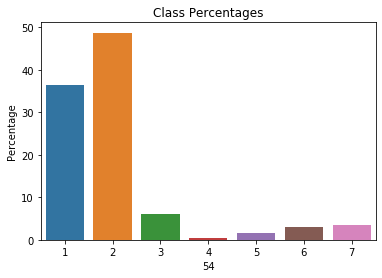

In [8]:
#class percentages

class_perc = pd.DataFrame(y).groupby(54).size() / 581012 * 100
class_perc = pd.DataFrame(class_perc)
class_perc.columns = ['Percentage']
sns.barplot(data=class_perc, x=class_perc.index, y='Percentage')
plt.title('Class Percentages')
plt.show()

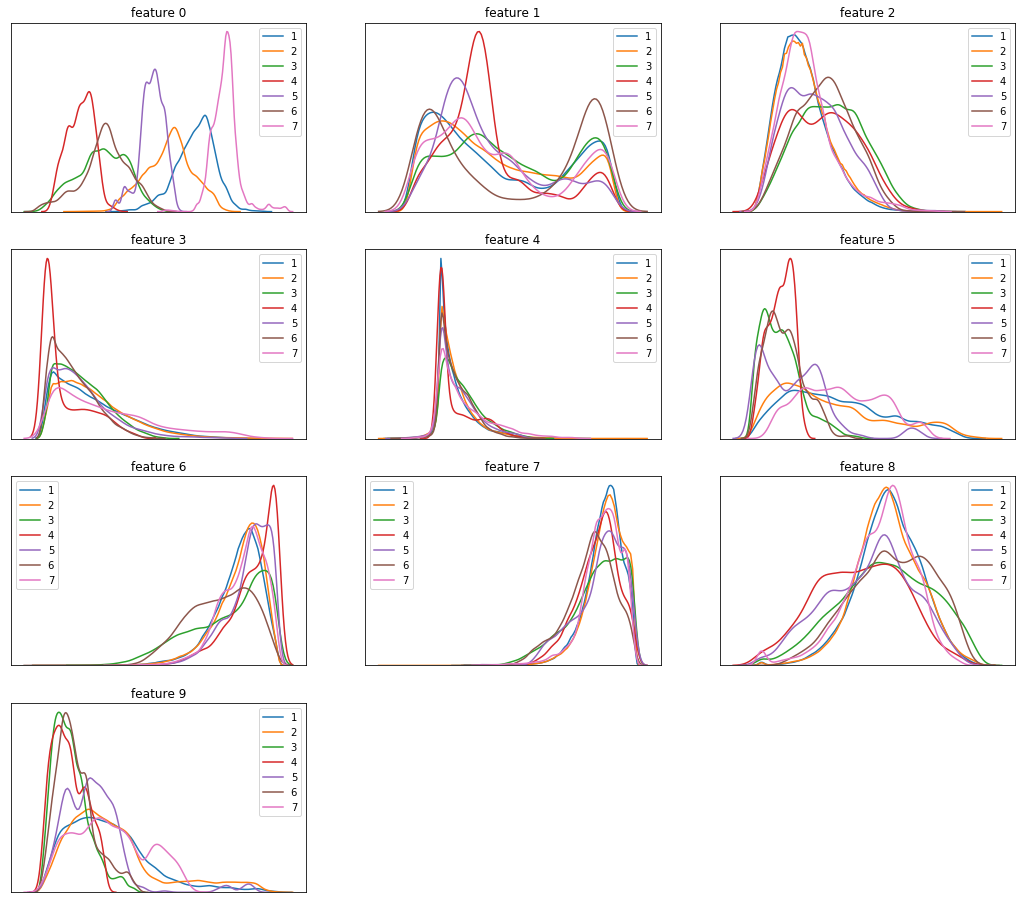

In [9]:
#density plot of each quantitative predictor variable grouped by the response variable.

plt.figure(figsize=(18,16))

for feat in range(0, 10):
    plt.subplot(4, 3, feat+1)
    for c in range(1, 8):
        sns.kdeplot(X.loc[(y == c), feat], label=c)
    plt.title('feature '+str(feat))
    plt.xticks([])
    plt.yticks([])
plt.legend()
plt.show()

#### Notes:
1. There is no missing data; hence, a million thanks to data collectors.
2. The first 10 features are quantitative (thus need scaling for some models) and the rest are categorical (already one-hot coded).
3. There are gross class imbalances. Class 4 is merely 0.5% of the data whereas class 2 is almost 49%.
4. The density of feature 0 (elevation in meters) showns biggest variation among classes. I suspect that feature 0 will be the strongest predictor among quantitative features.

## Step 2: Splitting the data into training and test sets

In [10]:
# I am setting 30% data aside for the test set.
# also assuring that the data is split in a stratified way

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=2020)

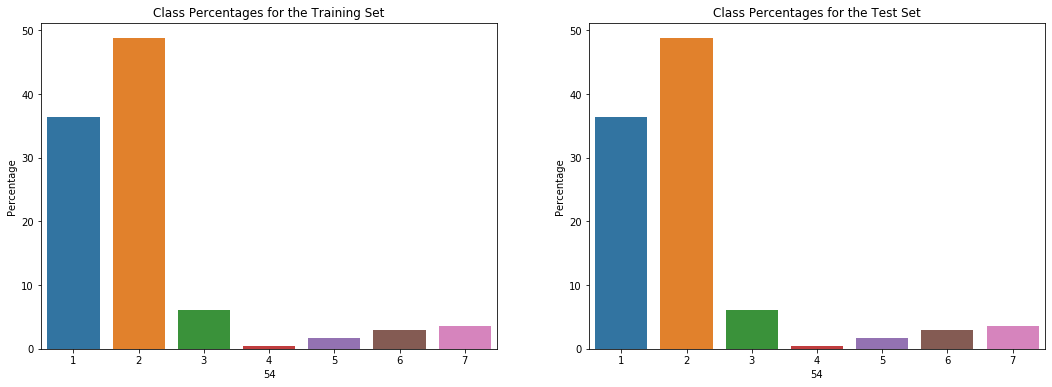

In [11]:
#sanity check
plt.figure(figsize=(18,6))

plt.subplot(1, 2, 1)
class_perc = pd.DataFrame(y_train).groupby(54).size() / len(y_train) * 100
class_perc = pd.DataFrame(class_perc)
class_perc.columns = ['Percentage']
sns.barplot(data=class_perc, x=class_perc.index, y='Percentage')
plt.title('Class Percentages for the Training Set')

plt.subplot(1, 2, 2)
class_perc = pd.DataFrame(y_test).groupby(54).size() / len(y_test) * 100
class_perc = pd.DataFrame(class_perc)
class_perc.columns = ['Percentage']
sns.barplot(data=class_perc, x=class_perc.index, y='Percentage')
plt.title('Class Percentages for the Test Set')

plt.show()

#### Notes:
1. I assigned 70% of the data to the training set and the remaining 30% to the test set.
2. The data is split in a stratified way to ensure equidistribution of the response variable in both sets.

## Step 3: Trying Various Algorithms Straight Out of Box
According to "No Free Lunch Theorem", there is no universal algorithm which outperforms all other methods. Equivalently, if you make no assumptions about the data, then there is no reason to prefer one model over any other. Thus, I will try a good number of models on the dataset and pick top performers for further study.

I will use 'accuracy' as the metric to determine which model outperforms the others. Accuracy is the percentage of instances correctly classified.

In [12]:
#models that don't need scaling

from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import (BaggingClassifier, 
                              ExtraTreesClassifier, 
                              GradientBoostingClassifier,
                              RandomForestClassifier)

models_tree = [
    ('DTC', DecisionTreeClassifier()),
    ('ETC', ExtraTreeClassifier(random_state=2020))
]

models_ensemble = [
    ('Bag', BaggingClassifier(random_state=2020)),
    ('ETsC', ExtraTreesClassifier(random_state=2020)),
    ('GBC', GradientBoostingClassifier(random_state=2020)),
    ('RFC', RandomForestClassifier(random_state=2020))
]

models_need_NO_scaling = models_tree + models_ensemble

#### Warning:
I decided against including several models (Linear Disriminant Analysis, Quadratic Discriminant Analysis, Gaussian Naive Bayes Classifier, and ADA Booost Classifier) due to the fact that they performed very poorly on initial trial runs.

In [13]:
#models that need scaling

from sklearn.linear_model import (LogisticRegression, 
                                  RidgeClassifier, 
                                  SGDClassifier)
from sklearn.neighbors import KNeighborsClassifier

models_lin = [
    ('Log_Reg', LogisticRegression()),
    ('Ridge', RidgeClassifier()),
    ('SGDC', SGDClassifier())
]

model_neigh = [('KNC', KNeighborsClassifier())]

models_need_scaling = models_lin + model_neigh

#### Warning:
I am not including Support Vector Classifier due to excessive computation time. (I was able to get 82.6% accuracy which is far below the other models after an overnight run).

#### Trying algorithms that do NOT need scaling on the training set
I am using 5-fold cross validation to evaluate the models on the training set with respect to 'accuracy'.

In [14]:
from sklearn.model_selection import cross_val_score

models = models_need_NO_scaling
cv = 5
scoring = 'accuracy'

cv_results = {}

for name, model in models:
    cv_res = cross_val_score(model, X_train, y_train, cv=cv, scoring=scoring, verbose=2, n_jobs=-1)
    cv_results[name] = cv_res

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   10.7s remaining:   16.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   10.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   10.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.4s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.0min remaining:  1.5min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.1min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent worker

In [15]:
results_df = pd.DataFrame(cv_results, index=range(1, cv+1))

In [16]:
results_df.mean(axis='index').sort_values()

GBC     0.771625
ETC     0.854269
DTC     0.927879
ETsC    0.946212
RFC     0.947107
Bag     0.954355
dtype: float64

In [17]:
results_df.std(axis='index')

DTC     0.000673
ETC     0.002891
Bag     0.000243
ETsC    0.001303
GBC     0.002456
RFC     0.000832
dtype: float64

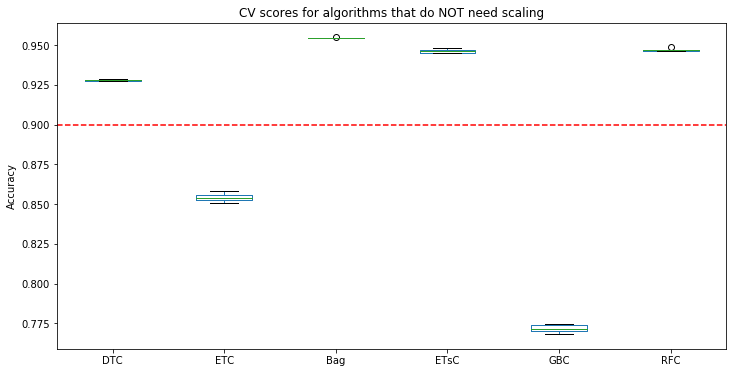

In [18]:
results_df.plot(kind='box', figsize=(12, 6))
plt.title('CV scores for algorithms that do NOT need scaling')
plt.axhline(y=0.9, color='red', linestyle='dashed')
plt.ylabel('Accuracy')
plt.show()

#### Trying algorithms that need scaling on the training set
Again, I am using 5-fold cross validation to evaluate the models on the training set with respect to 'accuracy'.

One has to be careful about data leakage! I formed a pipeline of each model with the Standard Scaler so as to prevent underestimation of errors in cross validation.

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

models_sc = models_need_scaling
cv = 5
scoring = 'accuracy'

cv_results_sc = {}


quan_features = list(range(0, 10))
preprocessor = ColumnTransformer(transformers=
                                [('scaler', StandardScaler(), quan_features)], remainder='passthrough')

for name, model in models_sc:
    model_pip = Pipeline([
        ('prep', preprocessor),
        (name, model)
    ])
    cv_res = cross_val_score(model_pip, X_train, y_train, cv=cv, scoring=scoring, verbose=2, n_jobs=-1)
    cv_results_sc[name] = cv_res

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   32.3s remaining:   48.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   34.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   34.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.1s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   11.2s remaining:   16.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   11.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   11.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent worker

In [20]:
results_df_sc = pd.DataFrame(cv_results_sc, index=range(1, cv+1))

In [21]:
results_df_sc.mean(axis='index').sort_values()

Ridge      0.701063
SGDC       0.712683
Log_Reg    0.724146
KNC        0.918185
dtype: float64

In [22]:
results_df_sc.std(axis='index')

Log_Reg    0.001934
Ridge      0.002139
SGDC       0.003103
KNC        0.000907
dtype: float64

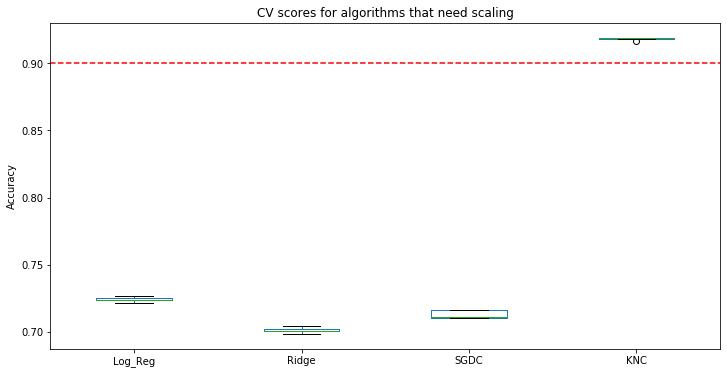

In [23]:
results_df_sc.plot(kind='box', figsize=(12, 6))
plt.title('CV scores for algorithms that need scaling')
plt.axhline(y=0.9, color='red', linestyle='dashed')
plt.ylabel('Accuracy')
plt.show()

#### Comparison of all out-of-box algorithms

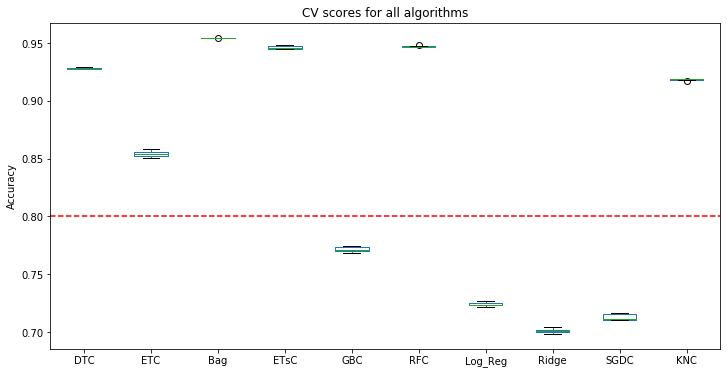

In [24]:
results = pd.concat([results_df, results_df_sc], axis='columns')

results.plot(kind='box', figsize=(12, 6))
plt.title('CV scores for all algorithms')
plt.axhline(y=0.8, color='red', linestyle='dashed')
plt.ylabel('Accuracy')
plt.show()

#### Results:
The following algorithms deserve further study:

* Bag -- Bagging Classifier
* RFC -- Random Forest Classifier
* ETsC -- Extra Trees Classifier
* KNC -- K-Neighbors Classifier

## Step 4: Fine Tuning of Promising Algorithms
I will fine-tune (find optimal hyperparameters) for the promising algorithms using 5-fold cross validation with respect to 'accuracy'.

In [25]:
from sklearn.model_selection import GridSearchCV

### KNC -- K-Neighbors Classifier

In [26]:
neighbors = list(range(1, 10))  #default=5, bias decreases as it decreases
par_grid_KNC = dict(KNC__n_neighbors=neighbors)

model = Pipeline([
    ('prep', preprocessor),
    ('KNC', KNeighborsClassifier())
])

grid_KNC = GridSearchCV(estimator=model, param_grid=par_grid_KNC, cv=cv, 
                        verbose=2, n_jobs=-1, scoring='accuracy')
grid_result_KNC = grid_KNC.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  8.8min finished


In [27]:
grid_result_KNC.best_params_

{'KNC__n_neighbors': 1}

In [28]:
grid_result_KNC.best_score_

0.9280343644311729

In [29]:
pd.DataFrame(grid_result_KNC.cv_results_)[['params', 'mean_test_score', 
                                           'std_test_score', 'rank_test_score']].sort_values('rank_test_score')

,params,mean_test_score,std_test_score,rank_test_score
0,{'KNC__n_neighbors': 1},0.928034,0.000699,1
2,{'KNC__n_neighbors': 3},0.923938,0.000850,2
4,{'KNC__n_neighbors': 5},0.918185,0.000811,3
3,{'KNC__n_neighbors': 4},0.917545,0.000586,4
1,{'KNC__n_neighbors': 2},0.915509,0.000694,5
5,{'KNC__n_neighbors': 6},0.913316,0.000833,6
6,{'KNC__n_neighbors': 7},0.913004,0.000875,7
7,{'KNC__n_neighbors': 8},0.909296,0.000867,8
8,{'KNC__n_neighbors': 9},0.908089,0.000833,9


#### The best estimator is with n_neighbors=1

### ETsC -- Extra Trees Classifier 

In [30]:
n_estimators = [100, 125, 150, 200]   #default=100, bias increases as it decreases

par_grid_X_tree = dict(n_estimators=n_estimators)

model = ExtraTreesClassifier(random_state=2020)

grid_X_tree = GridSearchCV(estimator=model, param_grid=par_grid_X_tree, cv=cv, 
                        verbose=2, n_jobs=-1, scoring='accuracy')
grid_result_X_tree = grid_X_tree.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed: 13.2min remaining:  3.3min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 16.3min finished


In [31]:
grid_result_X_tree.best_params_

{'n_estimators': 200}

In [32]:
grid_result_X_tree.best_score_

0.9471365187650165

In [33]:
pd.DataFrame(grid_result_X_tree.cv_results_)[['params', 'mean_test_score', 
                                           'std_test_score', 'rank_test_score']].sort_values('rank_test_score')

,params,mean_test_score,std_test_score,rank_test_score
3,{'n_estimators': 200},0.947137,0.001118,1
2,{'n_estimators': 150},0.946605,0.001147,2
1,{'n_estimators': 125},0.946330,0.001145,3
0,{'n_estimators': 100},0.946212,0.001165,4


#### The best estimator is with n_estimators=200

### RFC -- Random Forest Classifier

In [34]:
n_estimators = [100, 125, 150, 200]   #default=100, bias increases as it decreases

par_grid_rfc = dict(n_estimators=n_estimators)

model = RandomForestClassifier(random_state=2020)

grid_rfc = GridSearchCV(estimator=model, param_grid=par_grid_rfc, cv=cv, 
                        verbose=2, n_jobs=-1, scoring='accuracy')
grid_result_rfc = grid_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed: 11.3min remaining:  2.8min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 13.4min finished


In [35]:
grid_result_rfc.best_params_

{'n_estimators': 200}

In [36]:
grid_result_rfc.best_score_

0.9479061136968688

In [37]:
pd.DataFrame(grid_result_rfc.cv_results_)[['params', 'mean_test_score', 
                                           'std_test_score', 'rank_test_score']].sort_values('rank_test_score')

,params,mean_test_score,std_test_score,rank_test_score
3,{'n_estimators': 200},0.947906,0.000507,1
2,{'n_estimators': 150},0.947557,0.000773,2
1,{'n_estimators': 125},0.947515,0.000817,3
0,{'n_estimators': 100},0.947107,0.000744,4


#### The best estimator is with n_estimators=200

### Bag -- Bagging Classifier

In [38]:
n_estimators = [10, 25, 50, 75, 100]   #default=10, bias increases as it decreases

par_grid_bag = dict(n_estimators=n_estimators)

model = BaggingClassifier(random_state=2020)

grid_bag = GridSearchCV(estimator=model, param_grid=par_grid_bag, cv=cv, 
                        verbose=2, n_jobs=-1, scoring='accuracy')
grid_result_bag = grid_bag.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  25 | elapsed: 25.8min remaining:  2.2min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 28.0min finished


In [39]:
grid_result_bag.best_params_

{'n_estimators': 100}

In [40]:
grid_result_bag.best_score_

0.9611023157916758

In [41]:
pd.DataFrame(grid_result_bag.cv_results_)[['params', 'mean_test_score', 
                                           'std_test_score', 'rank_test_score']].sort_values('rank_test_score')

,params,mean_test_score,std_test_score,rank_test_score
4,{'n_estimators': 100},0.961102,0.000564,1
3,{'n_estimators': 75},0.960947,0.000400,2
2,{'n_estimators': 50},0.960463,0.000258,3
1,{'n_estimators': 25},0.959042,0.000339,4
0,{'n_estimators': 10},0.954355,0.000217,5


#### The best estimator is with n_estimators=100

#### Observation:
Ensemble methods with tree classifiers outperformed all other models by far. Therefore, in the final step we will evaluate Extra Trees Classifier, Random Forest Classifier, and Bagging Classifier on the test set to pick the final model.

## Step 5: Evaluation of the Tuned Models on the Test Set

In [42]:
from sklearn.metrics import accuracy_score

#### ETsC -- Extra Trees Classifier with n_estimators=200

In [43]:
x_tree = ExtraTreesClassifier(n_estimators=200, random_state=2020)
x_tree.fit(X_train, y_train)
preds = x_tree.predict(X_test)
print('ETsC accuracy: ', accuracy_score(y_test, preds))

ETsC accuracy:  0.9522099320727005


#### RFC -- Random Forest Classifier with n_estimators=200

In [44]:
rfc = RandomForestClassifier(n_estimators=200, random_state=2020)
rfc.fit(X_train, y_train)
preds = rfc.predict(X_test)
print('RFC accuracy: ', accuracy_score(y_test, preds))

RFC accuracy:  0.9533114558472554


#### Bag -- Bagging Classifier with n_estimators=100

In [45]:
bag = BaggingClassifier(n_estimators=100, random_state=2020)
bag.fit(X_train, y_train)
preds = bag.predict(X_test)
print('Bag accuracy: ', accuracy_score(y_test, preds))

Bag accuracy:  0.9654511657793281


#### Conclusion:
The best model among the ones we tried was Bagging Classifier with n_estimators=100 with an accuracy of 96.55% on the test set. The confusion matrix is below.

In [46]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, preds))

[[61085  2301     0     0    29     1   136]
 [ 1679 82959   107     0   145    75    26]
 [    0   134 10383    49    11   149     0]
 [    0     0    80   725     0    19     0]
 [   32   345    30     0  2429    12     0]
 [    6    82   275    30     9  4808     0]
 [  229    31     0     0     0     0  5893]]
